<p> Purpose of this notebook is to strictly produce figures for viewing the data comprehensively--no ML needed! </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

filename = '../Results/L1 2.5 nM'#'salvaged_RC_data.csv'#'dataset_072522.csv'
df = pd.read_csv(filename)

label="Labels"
features=features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
#        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
   'eccentricity'
         ]

In [2]:
# Modify Data (Remove illegal data OR set different runtime)
# Missed Labels
df['Labels'].replace('', np.nan, inplace=True) 
df.dropna(subset=['Labels'], inplace=True)
#df['Labels'].replace('Poorly Segmented', 'Incomplete', inplace=True)
#df['Labels'].replace('Multiple Crystal', 'Incomplete', inplace=True)

# Numerical errors (divide by 0)
for feature in features:
    df.dropna(subset=[feature],inplace=True)

# Remove Unnamed Columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

C_df = df[df['Labels'] == 'Crystal']
MC_df = df[df['Labels'] == 'Multiple Crystal']
I_df = df[df['Labels'] == 'Incomplete']
P_df = df[df['Labels'] == 'Poorly Segmented']

C_df = C_df[features]
MC_df = MC_df[features]
I_df = I_df[features]
P_df = P_df[features]

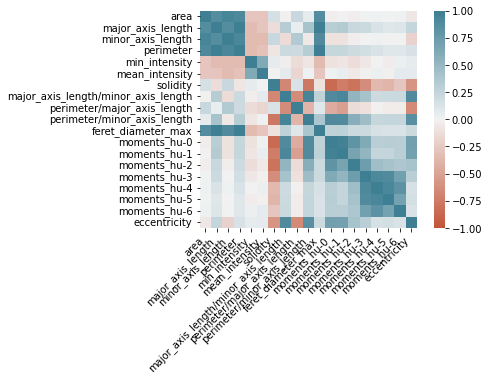

In [3]:
sub_df = C_df
corr = sub_df.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


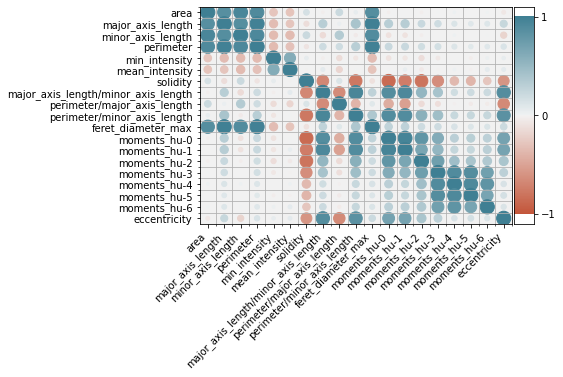

In [4]:
from heatmap import heatmap, corrplot
sub_df = C_df
corrplot(C_df.corr(),size_scale=200,marker='o')


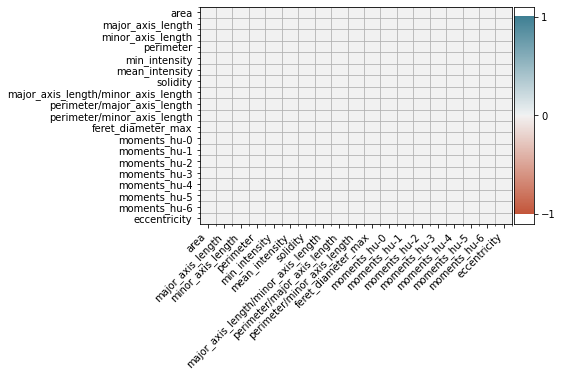

In [5]:
corrplot(MC_df.corr(),size_scale=200,marker='o')

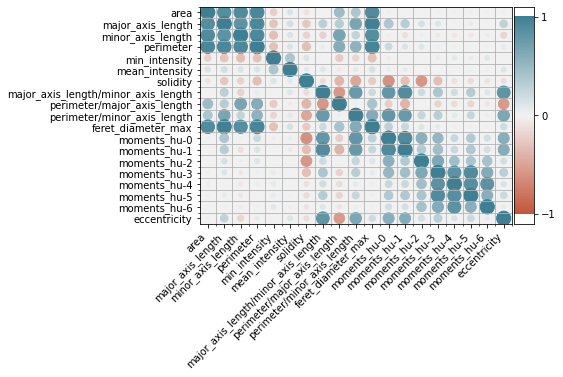

In [6]:
corrplot(I_df.corr(),size_scale=200,marker='o')

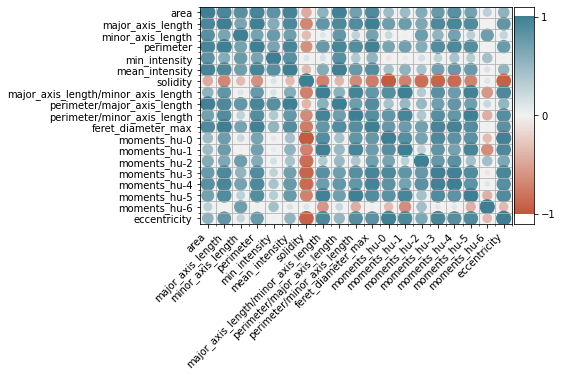

In [7]:
corrplot(P_df.corr(),size_scale=200,marker='o')

/tmp/ipykernel_7986/2994819098.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


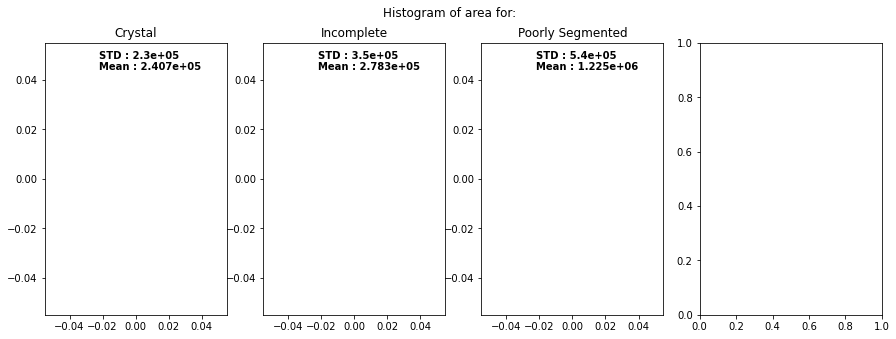

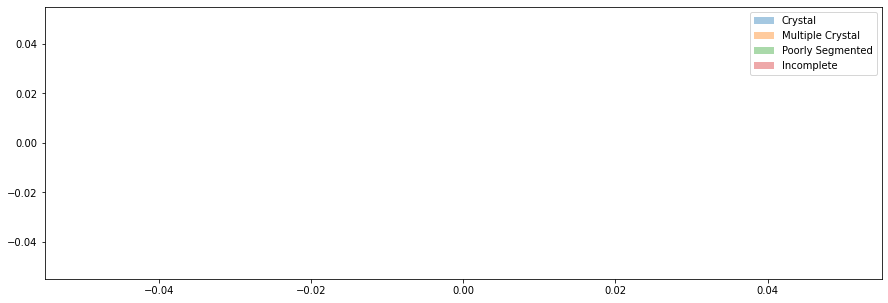

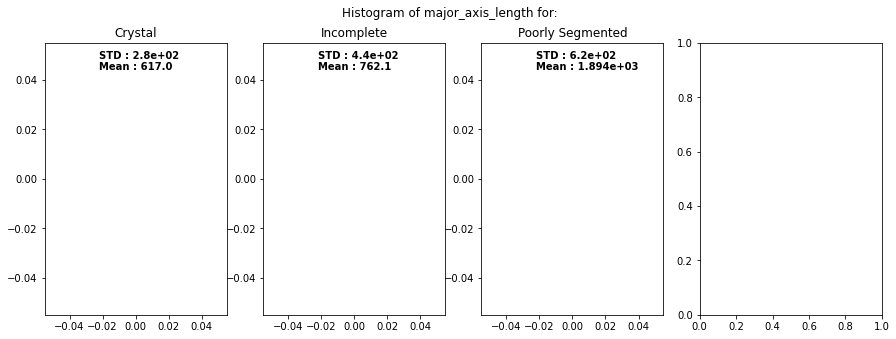

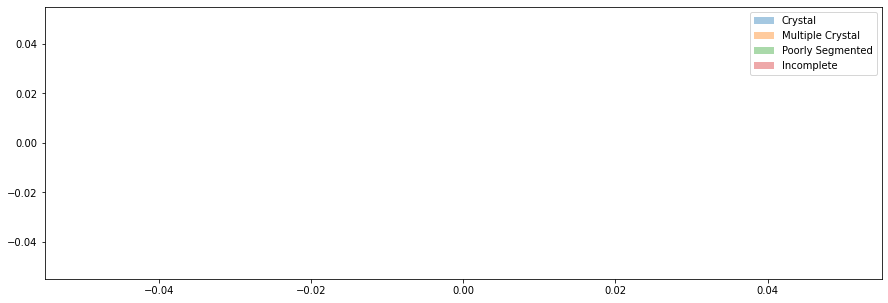

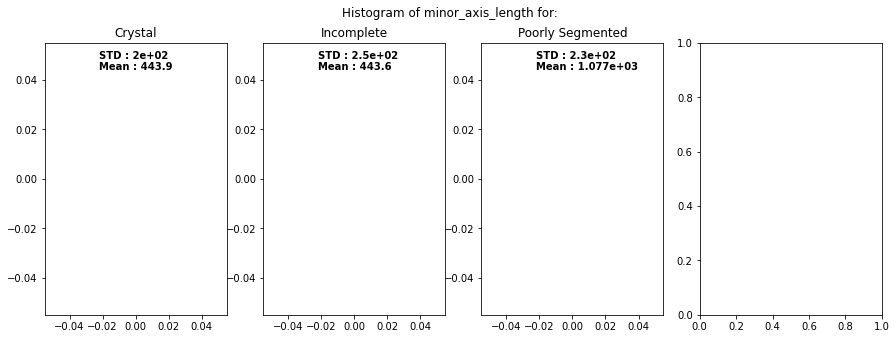

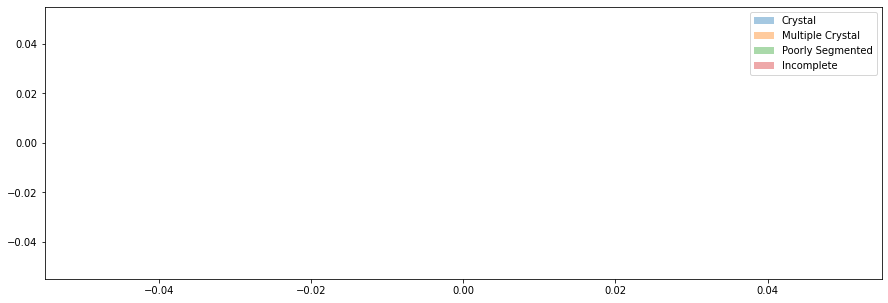

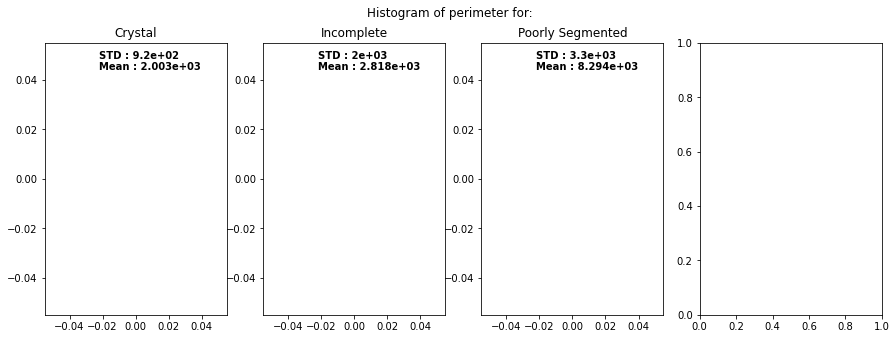

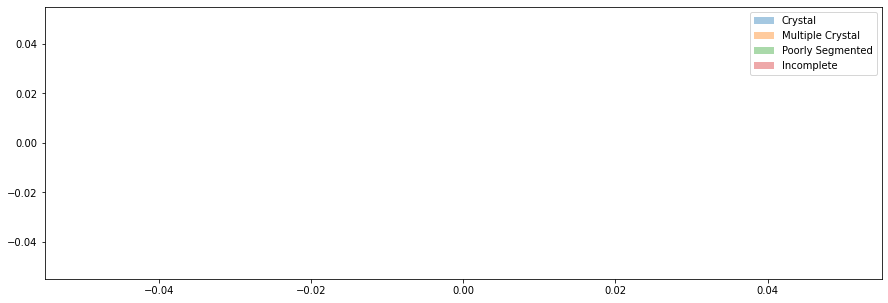

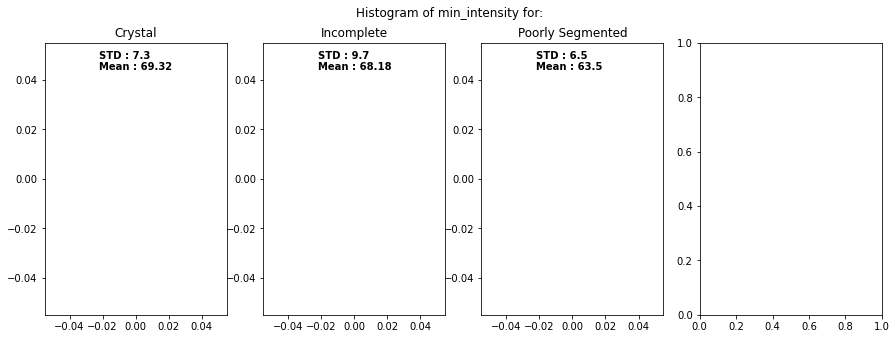

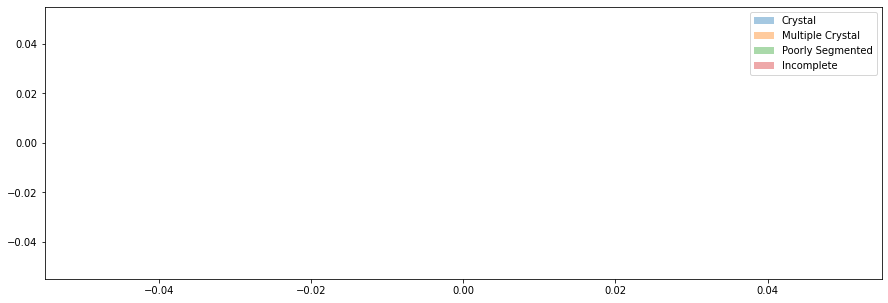

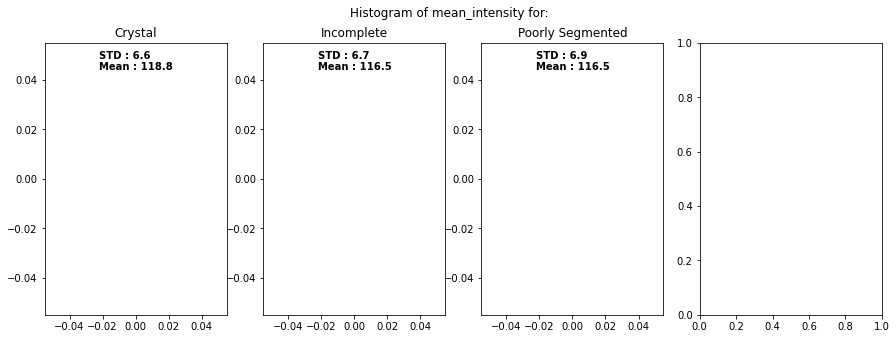

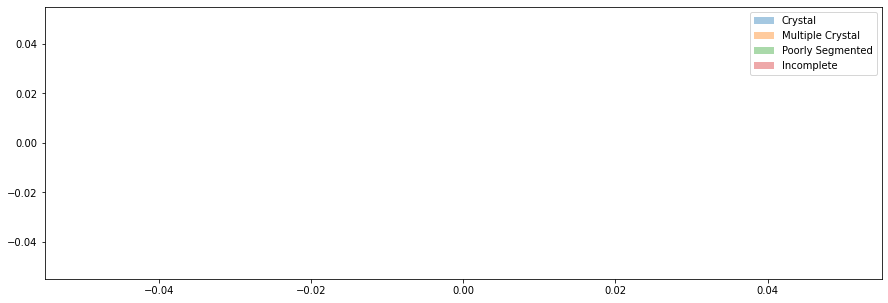

KeyError: 'max_intensity'

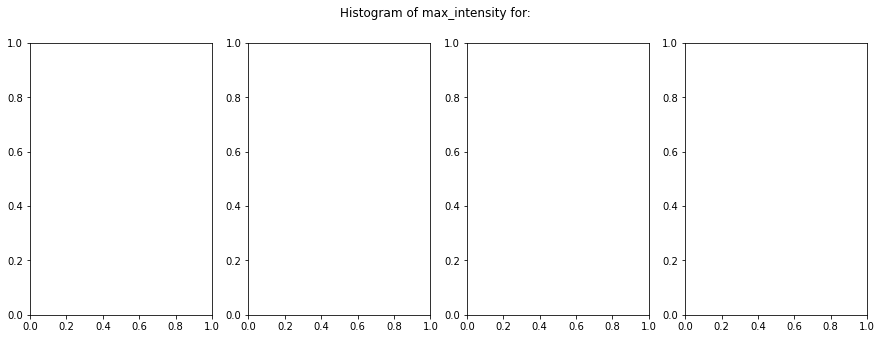

In [12]:
for feature in features:
    fig, ax = plt.subplots(1, 4,figsize = (15, 5))
    fig.suptitle(f'Histogram of {feature} for:')
    
    # Histogram common setting search
    histogram_min = np.min([np.min(C_df[feature]),np.min(MC_df[feature]),np.min(I_df[feature]),np.min(P_df[feature])])
    histogram_max = np.max([np.max(C_df[feature]),np.max(MC_df[feature]),np.max(I_df[feature]),np.max(P_df[feature])])
    histogram_bins = np.linspace(histogram_min,histogram_max,50)
    
    ii = 0
    for sub_label,sub_df in [('Crystal',C_df),('Multiple Crystal',MC_df),
                             ('Incomplete',I_df),('Poorly Segmented',P_df)]:
        ax[ii].hist(sub_df[feature],bins=histogram_bins)
        ax[ii].title.set_text(sub_label)
        sigma = np.std(sub_df[feature])
        mu = np.mean(sub_df[feature])
        stats_text = f'STD : {sigma:.2}\nMean : {mu:.4}'
        plt.text(0.3, 0.9, stats_text, fontweight="bold", transform=ax[ii].transAxes)
        ii += 1
    fig.show()
    
    # Overlapping Histograms
    plt.figure(figsize = (15, 5))
    labels_of_interest = ['Crystal','Multiple Crystal','Poorly Segmented','Incomplete']
    for exact_label in labels_of_interest:
        plt.hist(df[df["Labels"] == exact_label][feature],bins=histogram_bins,alpha=0.4,label=exact_label)
    plt.legend()
    plt.show()


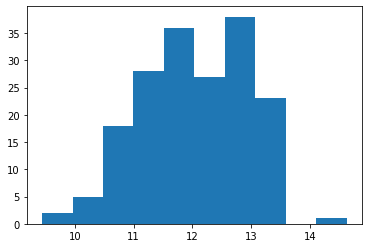

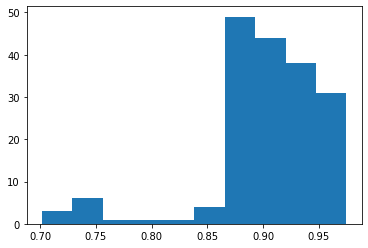

In [13]:
plt.hist(np.log(C_df['area']))
plt.show()
plt.hist(C_df['solidity'])
plt.show()

Crystal area (min,mean,max): 12642.753599999996,240745.0186921348,2234694.4956999994
Incomplete area (min,mean,max): 1492.5472999999995,278289.7605621169,2875085.0842999998
Poorly Segmented area (min,mean,max): 674806.9733999999,1225227.6887249995,1786140.1335999996


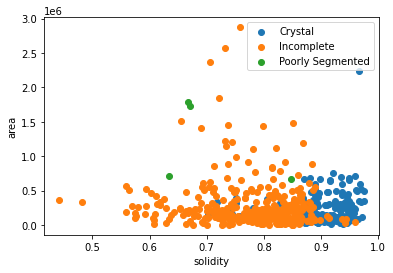

Crystal equivalent_diameter (min,mean,max): 126.87495354821942,506.80686785213993,1686.8021230503716
Incomplete equivalent_diameter (min,mean,max): 43.59323622705357,523.6992069224459,1913.288275145433
Poorly Segmented equivalent_diameter (min,mean,max): 926.9255221407644,1217.202489762933,1508.0398703409887


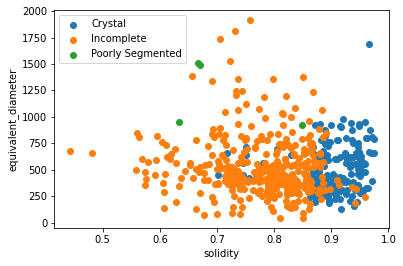

Crystal major_axis_length (min,mean,max): 148.74963467013333,617.0398631505545,1740.454092392464
Incomplete major_axis_length (min,mean,max): 49.29300129725388,762.0618206931662,2827.4573777077
Poorly Segmented major_axis_length (min,mean,max): 1053.9666994676318,1894.4953768566425,2680.7775751602185


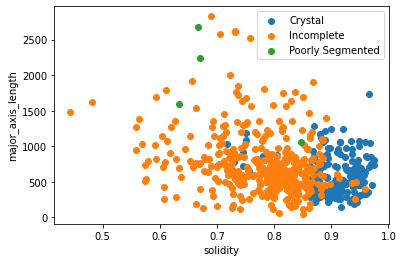

Crystal minor_axis_length (min,mean,max): 109.70202431610478,443.8779182791535,1640.1703449737388
Incomplete minor_axis_length (min,mean,max): 31.08016669134307,443.5803652458033,1648.0345617689115
Poorly Segmented minor_axis_length (min,mean,max): 860.4974786722079,1077.0528286454037,1439.2839152435638


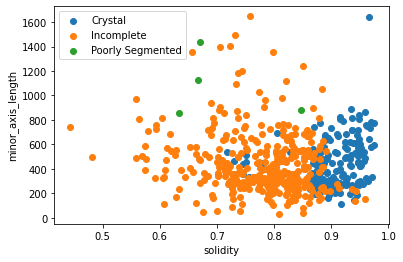

Crystal perimeter (min,mean,max): 418.1588972709744,2002.9506242722878,6458.347198178949
Incomplete perimeter (min,mean,max): 116.9870864766154,2818.4324448786547,13961.264158395026
Poorly Segmented perimeter (min,mean,max): 4183.310861854513,8293.823465946774,12546.051404484104


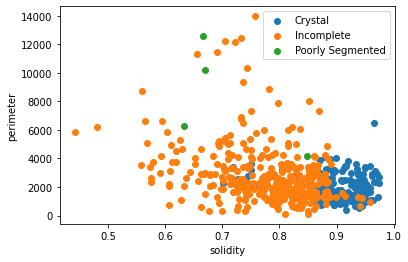

Crystal major_axis_length/minor_axis_length (min,mean,max): 1.0146188045839906,1.409898171561889,2.5926235631125194
Incomplete major_axis_length/minor_axis_length (min,mean,max): 1.028209272587258,1.7852906456423467,5.259235591979271
Poorly Segmented major_axis_length/minor_axis_length (min,mean,max): 1.1923753849469707,1.7482757960653814,2.3839559107527744


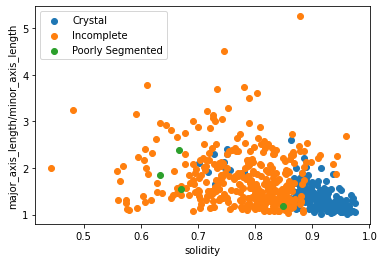

Crystal perimeter/major_axis_length (min,mean,max): 2.4549572803344946,3.2420750170759725,3.819398495398832
Incomplete perimeter/major_axis_length (min,mean,max): 1.96146423541359,3.5634477736621717,6.849758908054717
Poorly Segmented perimeter/major_axis_length (min,mean,max): 3.9129862956461,4.275442150228148,4.680004607892276


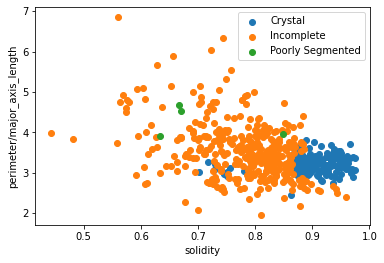

Crystal perimeter/minor_axis_length (min,mean,max): 3.399932993575862,4.5290425379296595,7.039109435829372
Incomplete perimeter/minor_axis_length (min,mean,max): 2.788453350529476,6.125488417281657,12.4449194905358
Poorly Segmented perimeter/minor_axis_length (min,mean,max): 4.732670303318066,7.559305450007775,11.15692464733501


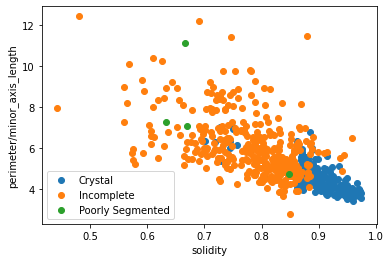

In [10]:
# Data Analysis Seed
features=['area',
    'equivalent_diameter', 
#    'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
#    'min_intensity',
#    'mean_intensity',
#    'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length']

comparison_feature = 'solidity'
label_list = np.unique(df["Labels"]) # ["Crystal","Poorly Segmented"]
feature_list = [feature for feature in features if feature != comparison_feature]

for feature in feature_list:
    for label in label_list:
        xlabel = comparison_feature
        ylabel = feature
        segregated_data = df[df["Labels"] == label]
        xdata=segregated_data[xlabel]
        ydata=segregated_data[ylabel]
        plt.scatter(xdata,ydata)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(label_list)
        print(f'{label} {feature} (min,mean,max): {np.min(ydata)},{np.average(ydata)},{np.max(ydata)}')
    plt.show()

    
features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
      'moments_hu-3',
      'moments_hu-4',
      'moments_hu-5',
      'moments_hu-6',
         ]

     principal component 1  principal component 2
0           -205076.360894             377.863040
1           -232470.801627             629.970381
2             28907.144306             164.428837
3           -224217.513024             584.829564
4           -209291.312385             495.327608
..                     ...                    ...
536          -14816.095209             109.978371
537           11261.637206            -187.696489
538          -54763.187147             -88.177814
539          145767.667216             -22.189758
540         -163806.323056            -507.583276

[541 rows x 2 columns]


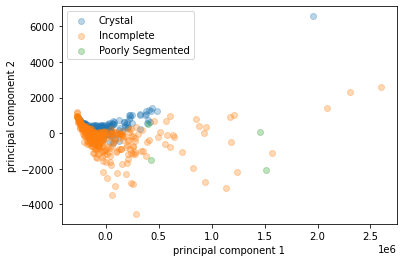

In [11]:
from sklearn.decomposition import PCA
X = df[features]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

finalDf = pd.concat([principalDf, df[['Labels']]], axis = 1)

for label in label_list:
    xlabel = 'principal component 1'
    ylabel = 'principal component 2'
    segregated_data = finalDf[finalDf["Labels"] == label]
    plt.scatter(segregated_data[xlabel],segregated_data[ylabel],alpha=.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(label_list)
plt.show()